In [1]:
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('scikit-allel version: %s' %allel.__version__)
print('pandas version: %s' %pd.__version__)
print('numpy version: %s' %np.__version__)

scikit-allel version: 1.3.5
pandas version: 2.0.1
numpy version: 1.23.5


In [2]:
import malariagen_data
print('malariagen_data version %s' %malariagen_data.__version__)
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")
ag3

malariagen_data version 7.5.0


<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
Species analysis        : aim_20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.5.0
Client location         : unknown
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

In [3]:
# gain access to the gateway
from dask_gateway import Gateway
gateway = Gateway()

In [4]:
# list available options
options = gateway.cluster_options()
options

In [5]:
# create a cluster with the options selected via the widgets above
# ... may take a few minutes to provision a VM for the scheduler
cluster = gateway.new_cluster(options)
cluster

In [6]:
cluster.scale(20)

In [7]:
client = cluster.get_client()

------------------------------------------

In [3]:
df_samples = ag3.sample_metadata(sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
df_samples.head()

Load sample metadata:   0%|          | 0/13 [00:00<?, ?it/s]

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


In [4]:
meta_fw = pd.read_excel('../Data/Meta/meta_new_3_0.xlsx', sheet_name="meta3.0")
meta_fw.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,longitude,latitude,sex_call,...,pca_pops,pca_country,aim_species_fraction_colu_no2l,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,An.gam,BFgam,0.016488,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,An.gam,BFgam,0.026316,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.981007,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.987593,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.973597,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


In [5]:
#excluding samples from location <5 and arabiensis
mysel = np.array(df_samples['sample_id'].isin(meta_fw['sample_id']))
mysel

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
def ld_prune(gn, pos, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
        pos_pruned = pos.compress(loc_unlinked, axis=0)
    return gn, pos_pruned

-----------------------------------
## Chromosome 2R

In [7]:
gt = ag3.snp_genotypes(region=["2R"], site_mask="gamb_colu", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt).subset(sel1 = mysel)
gt

<GenotypeDaskArray shape=(44439759, 1190, 2) dtype=int8>

In [8]:
pos = ag3.snp_sites(region=["2R"], field='POS', site_mask="gamb_colu")
ref = ag3.snp_sites(region=["2R"], field='REF', site_mask="gamb_colu")
alt = ag3.snp_sites(region=["2R"], field='ALT', site_mask="gamb_colu")

---------------------------
### Biallelic and MAF selection

In [9]:
ac = gt.count_alleles(max_allele=1).compute()
biallel = ac.is_biallelic()

In [10]:
gt_biallelic = gt.compress(biallel, axis=0)
ac_biallel = ac[biallel]

In [11]:
pos_biallelic = pos[biallel]
ref_biallelic = ref[biallel]
alt_biallelic = alt[:,0][biallel]

In [12]:
maf_min = 0.01

In [13]:
freqs = ac_biallel.to_frequencies()
maf_ok = np.min(np.array(freqs), axis=1) >= maf_min
gt_biallelic_maf = gt_biallelic.compress(maf_ok, axis=0)
pos_biallelic_maf = np.compress(maf_ok, pos, axis=0)

----------------------
### Downsampling

In [14]:
downsample_n = 100000

In [15]:
if pos.size > downsample_n:
        print("Downsampling... to {0} from {1}".format(downsample_n, pos_biallelic_maf.size))
        idx = np.random.choice(np.arange(0, pos_biallelic_maf.size), downsample_n, False)
        idx.sort()
        pos_downsampled = np.take(pos_biallelic_maf, idx)
        ref_downsampled = np.take(ref_biallelic, idx)
        alt_downsampled = np.take(alt_biallelic, idx)
        g_downsampled = gt_biallelic_maf.take(idx, axis=0)

Downsampling... to 100000 from 1677320


In [16]:
g_3R = g_downsampled.compute()
pos_3R = pos_downsampled.compute()
ref_3R = ref_downsampled
alt_3R = alt_downsampled

In [17]:
gn_3R = g_3R.to_n_alt()
gnu_3R, pos_3R_prun = ld_prune(gn_3R, pos_3R, size=500, step=200,  threshold=.1, n_iter=5)

iteration 1 retaining 69692 removing 30308 variants
iteration 2 retaining 68729 removing 963 variants
iteration 3 retaining 68578 removing 151 variants
iteration 4 retaining 68518 removing 60 variants
iteration 5 retaining 68499 removing 19 variants


-----------------------------

-----------------------------------
## Chromosome 2L

In [18]:
gt = ag3.snp_genotypes(region=["2L"], site_mask="gamb_colu", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt).subset(sel1 = mysel)
gt

<GenotypeDaskArray shape=(36005131, 1190, 2) dtype=int8>

In [19]:
pos = ag3.snp_sites(region=["2L"], field='POS', site_mask="gamb_colu")
ref = ag3.snp_sites(region=["2L"], field='REF', site_mask="gamb_colu")
alt = ag3.snp_sites(region=["2L"], field='ALT', site_mask="gamb_colu")

---------------------------
### Biallelic and MAF selection

In [ ]:
ac = gt.count_alleles(max_allele=1).compute()
biallel = ac.is_biallelic()

In [ ]:
gt_biallelic = gt.compress(biallel, axis=0)
ac_biallel = ac[biallel]

In [ ]:
pos_biallelic = pos[biallel]
ref_biallelic = ref[biallel]
alt_biallelic = alt[:,0][biallel]

In [ ]:
maf_min = 0.01

In [ ]:
freqs = ac_biallel.to_frequencies()
maf_ok = np.min(np.array(freqs), axis=1) >= maf_min
gt_biallelic_maf = gt_biallelic.compress(maf_ok, axis=0)
pos_biallelic_maf = np.compress(maf_ok, pos, axis=0)

----------------------
### Downsampling

In [ ]:
downsample_n = 100000

In [ ]:
if pos.size > downsample_n:
        print("Downsampling... to {0} from {1}".format(downsample_n, pos_biallelic_maf.size))
        idx = np.random.choice(np.arange(0, pos_biallelic_maf.size), downsample_n, False)
        idx.sort()
        pos_downsampled = np.take(pos_biallelic_maf, idx)
        ref_downsampled = np.take(ref_biallelic, idx)
        alt_downsampled = np.take(alt_biallelic, idx)
        g_downsampled = gt_biallelic_maf.take(idx, axis=0)

In [ ]:
g_3L = g_downsampled.compute()
pos_3L = pos_downsampled.compute()
ref_3L = ref_downsampled
alt_3L = alt_downsampled

In [ ]:
gn_3L = g_3L.to_n_alt()
gnu_3L, pos_3L_prun = ld_prune(gn_3L, pos_3L, size=500, step=200,  threshold=.1, n_iter=5)

In [ ]:
len(pos_3R_prun) + len(pos_3L_prun)

---------------------------------
## Merge

In [ ]:
gnu_tot = np.vstack((gnu_3R, gnu_3L))

In [ ]:
gnu_tot.shape

-----------------------------------
## PCA

In [ ]:
coords, model = allel.pca(gnu_tot, n_components=10, scaler='patterson')

In [ ]:
#new df for samples location
df_samples_fw = df_samples[mysel].merge(meta_fw, how = 'inner', on='sample_id')

In [ ]:
df_samples_fw.pca_pops.unique()

In [ ]:
populations = df_samples_fw.pca_pops.unique()

In [ ]:
pop_colours = {
'An.gam': '#1838DE',
'An.col': '#FF0000',
'gcx2': '#FFA500',
'gcx1-GW': '#98FB98',
'gcx1-GM': '#008000',
}


In [ ]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='.', linestyle='', mec=pop_colours[pop], mfc='none', mew=2, label=pop, markersize=6)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = df_samples_fw.pca_pops.values
    fig, ax = plt.subplots()
    y = model.explained_variance_
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, 'ko')
    ax.set_xticks(x)
    ax.set_xlabel('principal component')
    ax.set_ylabel('variance explained')
    ax.grid(axis='x')
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(2, 3, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(2, 3, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax = fig.add_subplot(2, 3, 3)
    plot_pca_coords(coords, model, 4, 5, ax, sample_population)
    ax = fig.add_subplot(2, 3, 4)
    plot_pca_coords(coords, model, 6, 7, ax, sample_population)
    ax = fig.add_subplot(2, 3, 5)
    plot_pca_coords(coords, model, 8, 9, ax, sample_population)

    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    fig.savefig('final_pca_2.png', dpi=300)

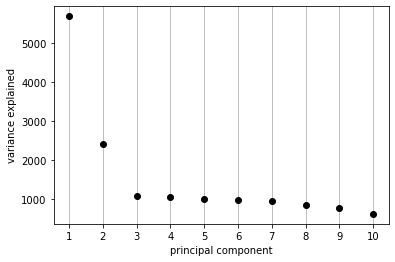

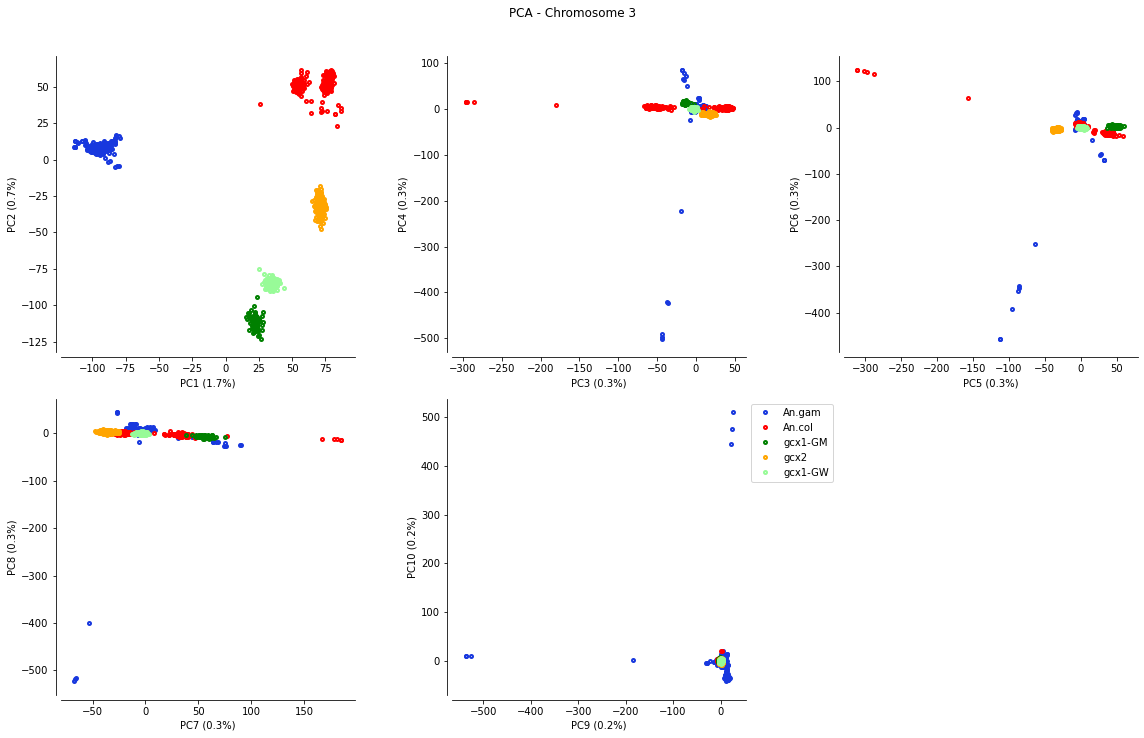

In [43]:
fig_pca(coords, model, 'PCA - Chromosome 3')

------------------------
## Save geno

In [163]:
import h5py
from allel import chunked

g_tot = np.vstack((g_3R.subset(sel0=np.in1d(pos_3R,pos_3R_prun)), g_3L.subset(sel0=np.in1d(pos_3L,pos_3L_prun))))
h5f = h5py.File('chrom_3_west_final.h5', mode='w')
h5g = h5f.create_group('3')
chunked.copy(g_tot, storage='hdf5', group=h5g, name='calldata')
h5f.close()

--------------------------------------
## Other Plots

In [139]:
meta = df_samples_fw
meta

,sample_id,partner_sample_id_x,contributor_x,country_x,location_x,year_x,month_x,latitude_x,longitude_x,sex_call_x,...,pca_pops,pca_country,aim_species_fraction_colu_no2l_y,taxon_y,cohort_admin1_year_y,cohort_admin1_month_y,cohort_admin1_quarter,cohort_admin2_year_y,cohort_admin2_month_y,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,An.gam,BFgam,0.016488,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,An.gam,BFgam,0.026316,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,An.col,BFcol,0.981007,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,An.col,BFcol,0.987593,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,An.col,BFcol,0.973597,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,AJ0060-C,BIS038,Joao Pinto,Guinea-Bissau,Antula,2010,-1,11.891,-15.582,F,...,gcx1-GW,gcx1-GW,0.130075,gcx1,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010
1186,AJ0068-C,BIS046,Joao Pinto,Guinea-Bissau,Antula,2010,-1,11.891,-15.582,F,...,gcx1-GW,gcx1-GW,0.315702,gcx1,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010
1187,AJ0080-C,BIS058,Joao Pinto,Guinea-Bissau,Antula,2010,-1,11.891,-15.582,F,...,gcx1-GW,gcx1-GW,0.284411,gcx1,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010
1188,AJ0087-C,BIS065,Joao Pinto,Guinea-Bissau,Antula,2010,-1,11.891,-15.582,F,...,gcx1-GW,gcx1-GW,0.370033,gcx1,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010,GW-BS_Bissau-Autonomous-Sector_gcx1_2010


In [140]:
import hashlib
import json


def hash_params(*args, **kwargs):
    o = {
        'args': args,
        'kwargs': kwargs
    }
    s = json.dumps(o).encode()
    h = hashlib.md5(s).hexdigest()
    return h


In [141]:
hash_params('foo', 42, bar=True, bax=None)

'322ba8280fd07fc5e938c1365345dd35'

In [153]:
def plot_coords(
    data,
    x='PC1',
    y='PC2',
    z=None,
    color=None,
    color_map=None,
    color_continuous_scale=None,
    symbol=None,
    symbol_map=None,
    jitter_frac=0.02,
    title=None,
    marker_size=8,
    template='simple_white',
    slug=None,
    random_seed=42,
    show=False,
    ):

    # setup data
    data = data.copy()
    
    # add PC coords as dataframe columns, with jitter if desired
    if jitter_frac:
        np.random.seed(random_seed)
        data[x] = jitter(data[x], jitter_frac)
        data[y] = jitter(data[y], jitter_frac)
        if z:
            data[z] = jitter(data[z], jitter_frac)
    
    # setup common plotting arguments
    scatter_kwargs = dict(
        color=color, 
        color_discrete_map=color_map,
        color_continuous_scale=color_continuous_scale,
        symbol=symbol,
        symbol_map=symbol_map,
        hover_name='sample_id',
        hover_data=[
            'pca_pops',
        ],
        width=850,
        height=650,
        title=title,
        template=template,
    )
        
    
    # hack fixed marker size, 2D only (3D has bugs)
    if marker_size and not z:
        data['size'] = marker_size
        scatter_kwargs['size'] = 'size'
        scatter_kwargs['size_max'] = marker_size
        scatter_kwargs['opacity'] = 0.9

    if z:
        # 3D scatter plot
        fig = px.scatter_3d(data, x=x, y=y, z=z, **scatter_kwargs)
        
    else:
        # 2D scatter plot
        fig = px.scatter(data, x=x, y=y, render_mode='svg', **scatter_kwargs)
        
    if slug:
        path = f'plot-{slug}-{x}-{y}-{z}-{color}.html'
        fig.write_html(path, include_plotlyjs='cdn')
                
    if show:
        fig.show()

In [143]:
data = meta.copy()
for i in range(2):
    data[f'PC{i+1}'] = coords[:, i]
    # save results
    evr = model.explained_variance_ratio_
    data.to_csv('chr3_pca_final.csv', index=False)
    np.save('chr3_pca_final.npy', evr)

In [144]:
import plotly.express as px

In [154]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1


pca_symbols = {
    'An.gam': 'circle', 
    'An.col': 'circle',
    'gcx2': 'circle',
    'gcx1-GM': 'circle',
    'gcx1-GW': 'circle',
}


species_color_map = {
    'An.gam':  species_palette[19],
    'An.col': species_palette3[0],
    'gcx2': species_palette3[4],
    'gcx1-GM': species_palette[2],
    'gcx1-GW': species_palette2[2],
}

In [155]:
def jitter(a, f):
    r = a.max() - a.min()
    return a + f * np.random.uniform(-r, r, a.shape)

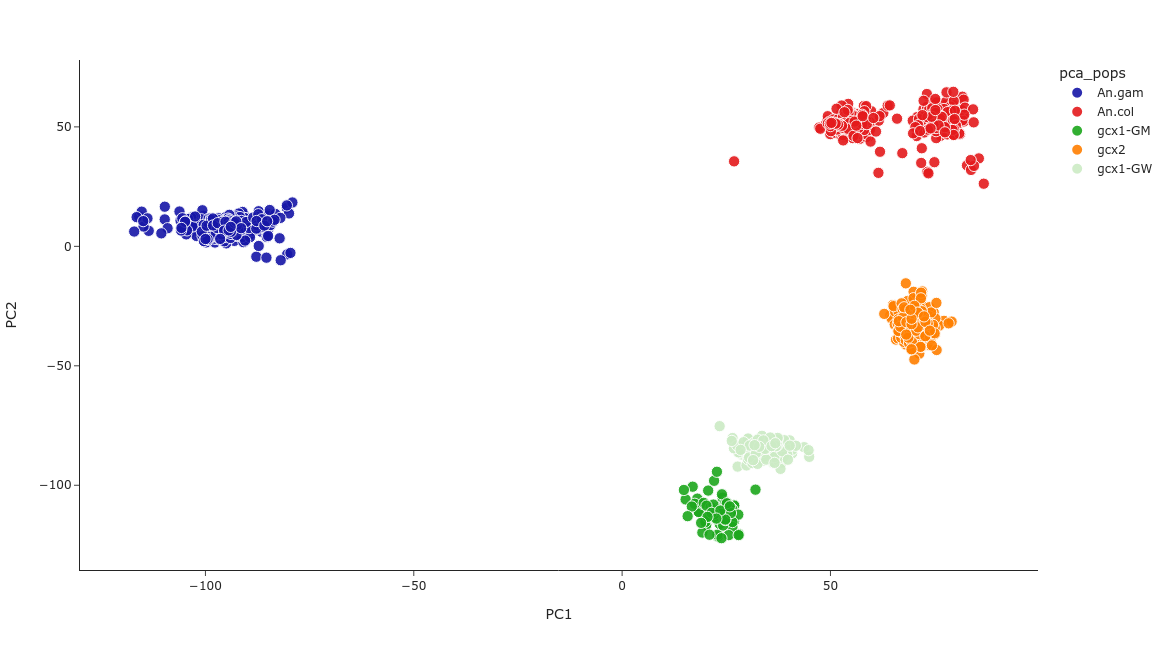

In [156]:
plot_coords(data, x='PC1', y='PC2',
            color='pca_pops', color_map=species_color_map, slug = 'pca',
            show=True)

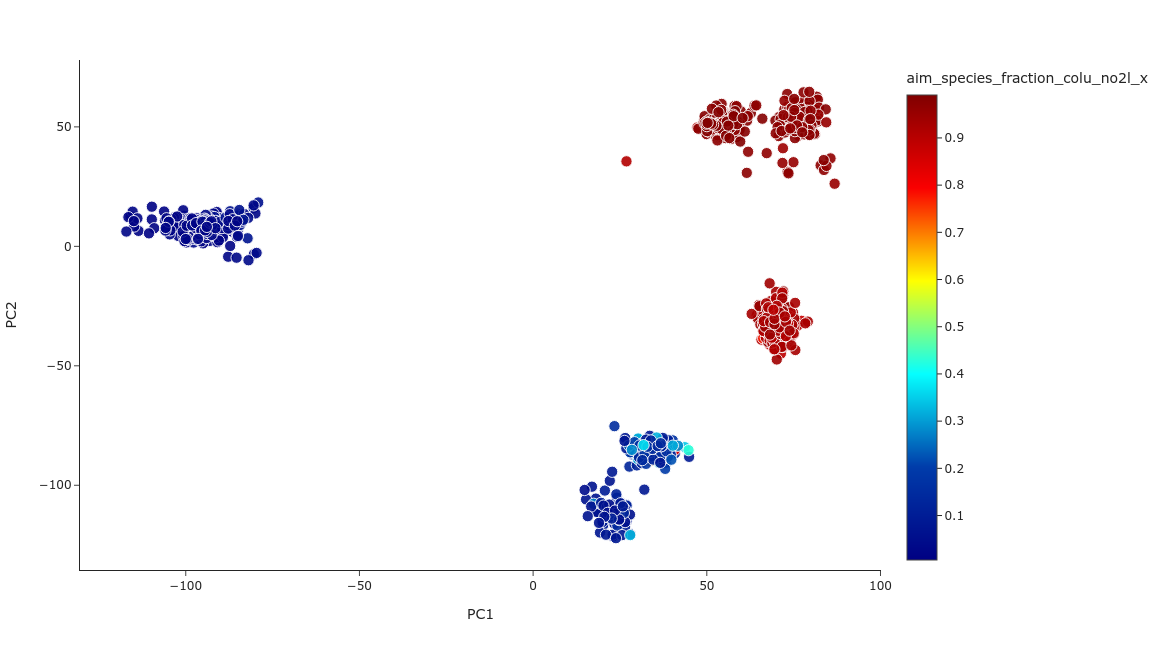

In [162]:
plot_coords(data, x='PC1', y='PC2',
            color='aim_species_fraction_colu_no2l_x', color_continuous_scale='jet', slug = 'pca',
            show=True, )

In [149]:
species_palette = px.colors.qualitative.Plotly
species_color_map = {
    '2La_hom': species_palette[0],
    '2La_het': species_palette[6],
    'arabiensis': species_palette[2],
    '2La_alt': species_palette[3],
    'intermediate_arabiensis_gambiae': species_palette[4],
}
species_symbols = {
    'gambiae': 'circle', 
    'coluzzii': 'diamond',
    'intermediate_gambiae_coluzzii': 'star',
    'arabiensis': 'square',
    'intermediate_arabiensis_gambiae': 'triangle',
}

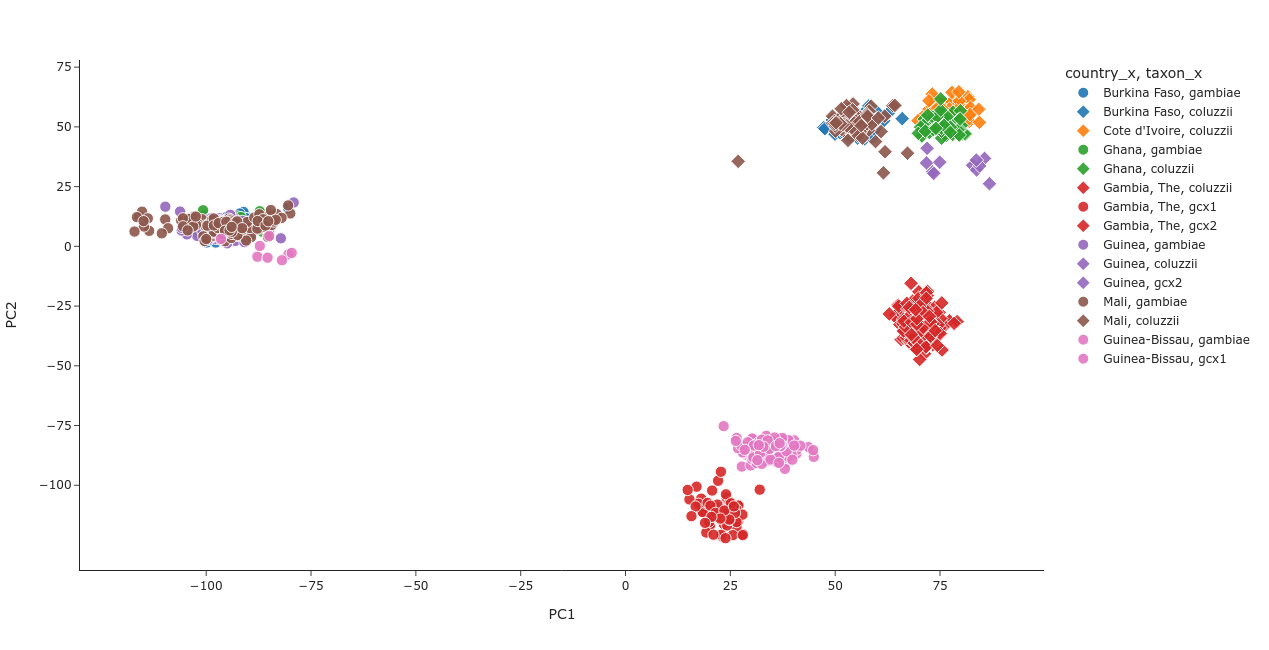

In [150]:
plot_coords(data, x='PC1', y='PC2',
            color='country_x', symbol='taxon_x', symbol_map=species_symbols, slug = 'pca',
            show=True)

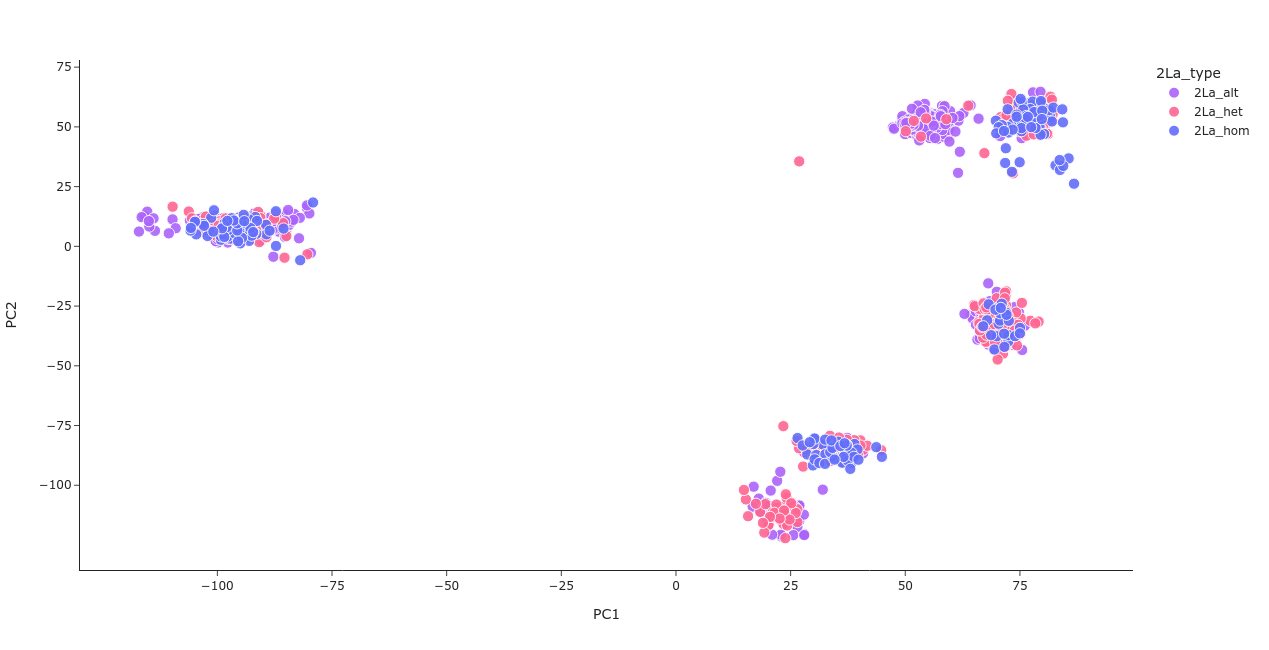

In [151]:
plot_coords(data, x='PC1', y='PC2',
            color='2La_type', color_map=species_color_map, slug = 'pca',
            show=True)

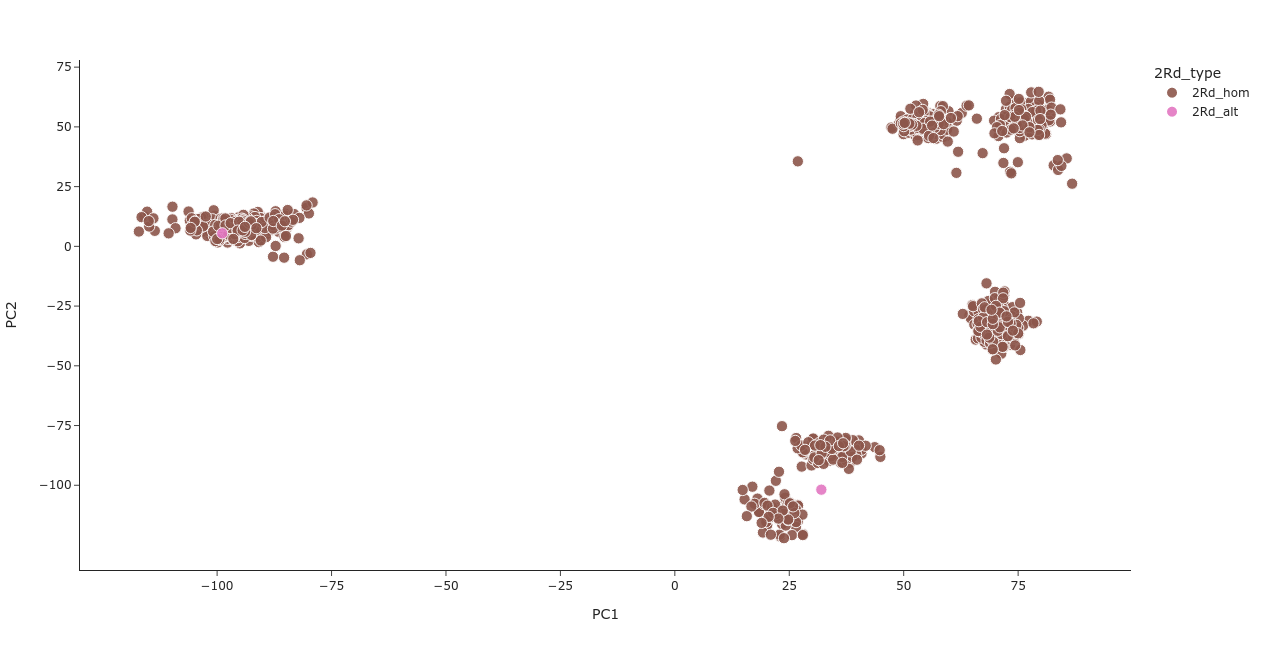

In [152]:
plot_coords(data, x='PC1', y='PC2',
            color='2Rd_type', color_map=species_color_map, slug = 'pca',
            show=True)

-------------------------------------
#  Ped files generation for ADMIXTURE ####

## New Method

In [66]:
### save pos file
import csv
with open("pos_3R_prun.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(list(pos_3R_prun))
    
with open("pos_3L_prun.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(list(pos_3L_prun))

In [130]:
ds_snps_3R = ag3.snp_calls(
    region="3R",
    sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"],
    site_mask="gamb_colu",
)
ds_snps_asc_3R = (
    ds_snps_3R
    [["variant_contig", "variant_position", "variant_allele", "sample_id", "call_genotype"]]
    .isel(alleles=slice(0, 2))
    .sel(variants=ds_snps_3R.variants.isin(pos_3R_prun))
    .sel(samples=mysel)
)
gt = ds_snps_asc_3R["call_genotype"].data
ds_snps_asc_3R["call_gn_ref"] = ("variants", "samples"), gnu_3R
val = ds_snps_asc_3R["call_gn_ref"].values.T
val_3R = np.where(val==-1, np.nan, val)
alleles_3R = ds_snps_asc_3R["variant_allele"].values
properties_3R = {
    "iid": ds_snps_asc_3R["sample_id"].values,
    "chromosome": ds_snps_asc_3R["variant_contig"].values,
    "bp_position": ds_snps_asc_3R["variant_position"].values,
    "allele_1": alleles_3R[:, 0],
    "allele_2": alleles_3R[:, 1],
}

In [131]:
ds_snps_3L = ag3.snp_calls(
    region="3L",
    sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"],
    site_mask="gamb_colu",
)
ds_snps_asc_3L = (
    ds_snps_3L
    [["variant_contig", "variant_position", "variant_allele", "sample_id", "call_genotype"]]
    .isel(alleles=slice(0, 2))
    .sel(variants=ds_snps_3L.variants.isin(pos_3L_prun))
    .sel(samples=mysel)
)
gt = ds_snps_asc_3L["call_genotype"].data
ds_snps_asc_3L["call_gn_ref"] = ("variants", "samples"), gnu_3L
val = ds_snps_asc_3L["call_gn_ref"].values.T
val_3L = np.where(val==-1, np.nan, val)
alleles_3L = ds_snps_asc_3L["variant_allele"].values
properties_3L = {
    "iid": ds_snps_asc_3L["sample_id"].values,
    "chromosome": ds_snps_asc_3L["variant_contig"].values,
    "bp_position": ds_snps_asc_3L["variant_position"].values,
    "allele_1": alleles_3L[:, 0],
    "allele_2": alleles_3L[:, 1],
}

In [132]:
alleles_full = np.vstack((alleles_3R,alleles_3L))

In [133]:
properties_full_3 = {}
properties_full_3

{}

In [134]:
properties_full_3["iid"] = ds_snps_asc_3L["sample_id"].values
properties_full_3['chromosome'] = np.hstack((properties_3R['chromosome'], properties_3L['chromosome']))
properties_full_3['bp_position'] = np.hstack((properties_3R['bp_position'], properties_3L['bp_position']))
properties_full_3['allele_1'] = np.hstack((properties_3R['allele_1'], properties_3L['allele_1']))
properties_full_3['allele_2'] = np.hstack((properties_3R['allele_2'], properties_3L['allele_2']))

In [135]:
properties_full_3["iid"].shape, properties_full_3["chromosome"].shape, properties_full_3["bp_position"].shape, properties_full_3["allele_1"].shape, properties_full_3["allele_2"].shape

((1190,), (160926,), (160926,), (160926,), (160926,))

In [136]:
val_full = np.hstack((val_3R,val_3L))

In [137]:
import bed_reader

In [138]:
bed_reader.to_bed(
    filepath="chrom_3_full_pruned.bed",
    val=val_full,
    properties=properties_full_3,
    count_A1=True,
)

## Old Method

### Chrom 3R

In [ ]:
refalt = np.column_stack([ref_3R, alt_3R])
refalt, refalt.shape

In [ ]:
df_alleles = pd.DataFrame(refalt.astype('<U16'), columns=['ref', 'alt'])

In [ ]:
df_alleles['0'] = df_alleles['ref'] + " " + df_alleles['ref']
df_alleles['1'] = df_alleles['ref'] + " " + df_alleles['alt']
df_alleles['2'] = df_alleles['alt'] + " " + df_alleles['alt']

In [ ]:
g_d = g_3R.to_n_alt(fill=-1).compute()
g_reshaped = np.transpose(g_d, (1,0))
g_reshaped_df = pd.DataFrame((g_reshaped).astype(str))

In [ ]:
df_alleles_T = df_alleles.T
dict_alleles = df_alleles_T.to_dict()
df_ped = (g_reshaped_df.astype(str).replace(dict_alleles))
df_ped['Family ID'] = meta_fw['sample_id'].loc[:]
df_ped['Individual ID'] = meta_fw['sample_id'].loc[:]
df_ped = df_ped.set_index('Individual ID').reset_index()
df_ped = df_ped.set_index('Family ID').reset_index()
df_ped['phenotype'] = df_ped[df_ped.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df_ped['Paternal ID'] = 0
df_ped['Maternal ID'] = 0
df_ped['Sex'] = 2
df_ped['Not used'] = 0
df_ped = df_ped[['Family ID', 'Individual ID', 'Paternal ID', 'Maternal ID', 'Sex', 'Not used', 'phenotype']]
df_ped.head()

In [ ]:
df_ped.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3R.ped', sep=" ", header=None, index=False)

In [ ]:
df_map_n = pd.DataFrame()
df_map_n['3'] = pos_3R
df_map_n['1'] = '3R'+":"+df_map_n['3'].astype("str")
df_map_n['2'] = '0'
df_map_n['0'] = '3R'
df_map_n = df_map_n[['0','1','2','3']]
df_map_n.head()

In [ ]:
df_map_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3R.map', sep="\t", header=None, index=False)

In [ ]:
df_nosex_n = pd.DataFrame()
df_nosex_n['0'] = meta_fw['sample_id']
df_nosex_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3R.nosex', sep=" ", header=None, index=False)

###  Chrom 3L

In [ ]:
refalt = np.column_stack([ref_3L, alt_3L])
refalt, refalt.shape

In [ ]:
df_alleles = pd.DataFrame(refalt.astype('<U16'), columns=['ref', 'alt'])

In [ ]:
df_alleles['0'] = df_alleles['ref'] + " " + df_alleles['ref']
df_alleles['1'] = df_alleles['ref'] + " " + df_alleles['alt']
df_alleles['2'] = df_alleles['alt'] + " " + df_alleles['alt']

In [ ]:
g_d = g_3L.to_n_alt(fill=-1).compute()
g_reshaped = np.transpose(g_d, (1,0))
g_reshaped_df = pd.DataFrame((g_reshaped).astype(str))

In [ ]:
df_alleles_T = df_alleles.T
dict_alleles = df_alleles_T.to_dict()
df_ped = (g_reshaped_df.astype(str).replace(dict_alleles))
df_ped['Family ID'] = meta_fw['sample_id'].loc[:]
df_ped['Individual ID'] = meta_fw['sample_id'].loc[:]
df_ped = df_ped.set_index('Individual ID').reset_index()
df_ped = df_ped.set_index('Family ID').reset_index()
df_ped['phenotype'] = df_ped[df_ped.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df_ped['Paternal ID'] = 0
df_ped['Maternal ID'] = 0
df_ped['Sex'] = 2
df_ped['Not used'] = 0
df_ped = df_ped[['Family ID', 'Individual ID', 'Paternal ID', 'Maternal ID', 'Sex', 'Not used', 'phenotype']]
df_ped.head()

In [ ]:
df_ped.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3L.ped', sep=" ", header=None, index=False)

In [ ]:
df_map_n = pd.DataFrame()
df_map_n['3'] = pos_3L
df_map_n['1'] = '3L'+":"+df_map_n['3'].astype("str")
df_map_n['2'] = '0'
df_map_n['0'] = '3L'
df_map_n = df_map_n[['0','1','2','3']]
df_map_n.head()

In [ ]:
df_map_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3L.map', sep="\t", header=None, index=False)

In [ ]:
df_nosex_n = pd.DataFrame()
df_nosex_n['0'] = meta_fw['sample_id']
df_nosex_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_3L.nosex', sep=" ", header=None, index=False)